<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#White-Noise-Model" data-toc-modified-id="White-Noise-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>White Noise Model</a></span><ul class="toc-item"><li><span><a href="#Properites" data-toc-modified-id="Properites-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Properites</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Random-Walk-Model" data-toc-modified-id="Random-Walk-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Walk Model</a></span><ul class="toc-item"><li><span><a href="#Properites" data-toc-modified-id="Properites-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Properites</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Variation:-Random-Walk-w/-a-Drift" data-toc-modified-id="Variation:-Random-Walk-w/-a-Drift-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Variation: Random Walk w/ a Drift</a></span></li></ul></li><li><span><a href="#Autoregressive-(AR)-Model" data-toc-modified-id="Autoregressive-(AR)-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Autoregressive (AR) Model</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Moving-Average-(MA)-Model" data-toc-modified-id="Moving-Average-(MA)-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Moving Average (MA) Model</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#ARMA-Model" data-toc-modified-id="ARMA-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ARMA Model</a></span><ul class="toc-item"><li><span><a href="#Higher-Order" data-toc-modified-id="Higher-Order-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Higher Order</a></span></li></ul></li><li><span><a href="#Forecasting-a-Time-Series" data-toc-modified-id="Forecasting-a-Time-Series-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Forecasting a Time Series</a></span><ul class="toc-item"><li><span><a href="#Train,-Validation,-Test" data-toc-modified-id="Train,-Validation,-Test-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Train, Validation, Test</a></span><ul class="toc-item"><li><span><a href="#Fixed-Partitioning" data-toc-modified-id="Fixed-Partitioning-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Fixed Partitioning</a></span></li><li><span><a href="#Roll-Forward-Partitioning" data-toc-modified-id="Roll-Forward-Partitioning-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Roll-Forward Partitioning</a></span></li></ul></li><li><span><a href="#The-Baseline-Model---Naive-Forecasting" data-toc-modified-id="The-Baseline-Model---Naive-Forecasting-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>The Baseline Model - Naive Forecasting</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(27)

# Objectives

- Build simple models like the white noise and random walk models
- Explain auto-regressive and moving-average models

# White Noise Model

https://machinelearningmastery.com/white-noise-time-series-python/

The **white noise model** is a stationary series where the error term is randomly distributed around the mean, has constant variance, and no autocorrelation.

This might not sound very useful at first, but we can use this to build more complex models.

## Properites

- Fixed/constant mean
- Fixed/constant variance
- No correlation over time (pattern is random)

Formula: $Y(t) = \epsilon(t)$ where $\epsilon(t+1)$ is a value independent of $\epsilon(t)$

> Note that *Gaussian white noise* model has mean of 0 and variance of 1

## Example

In [2]:
# Create a date series
n_days = 100
date_series = pd.date_range(start='1/1/2015', periods=n_days)

# Create a normally distributed temperature values for each day
avg_temp = 10
std_temp = 3

temp_series = np.random.normal(avg_temp, std_temp, n_days)

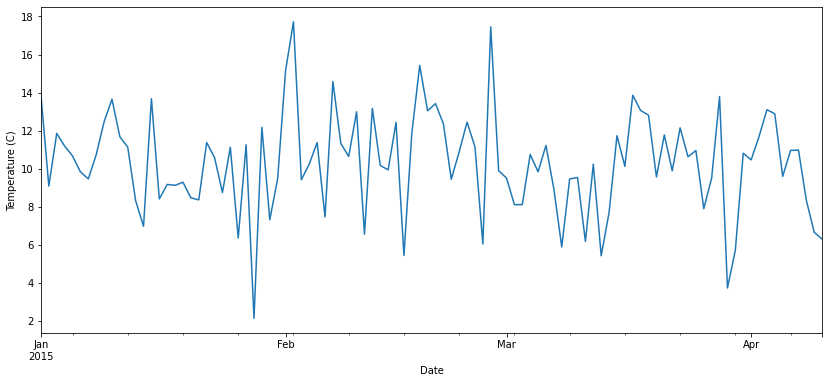

In [3]:
time_series = pd.Series(data=temp_series, index=date_series)


ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")
plt.show()

# Random Walk Model

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

## Properites

Previous value will influence the current value

- No specified mean
- No specified variance
- Strong dependence over time

Formula: $Y(t) = Y(t-1) + \epsilon(t)$

$\epsilon(t)$ is a white noise model with mean=0

## Example

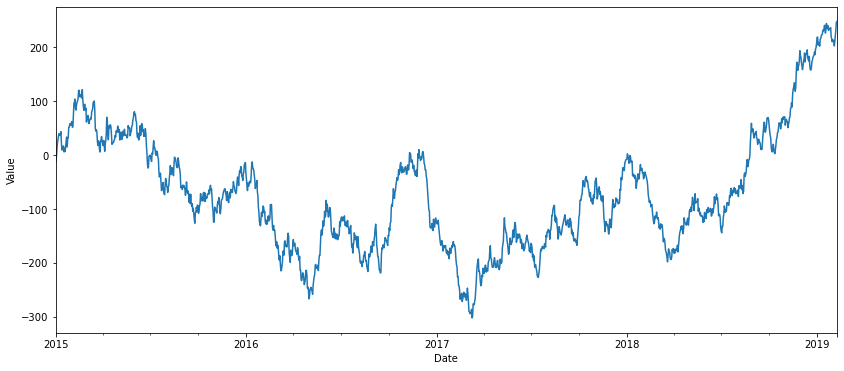

In [4]:
avg = 0
std = 10
n_pts = 1500

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

## Variation: Random Walk w/ a Drift

"Drifts" with a particular value

Formula: $Y(t) = c + Y(t-1) + \epsilon(t)$

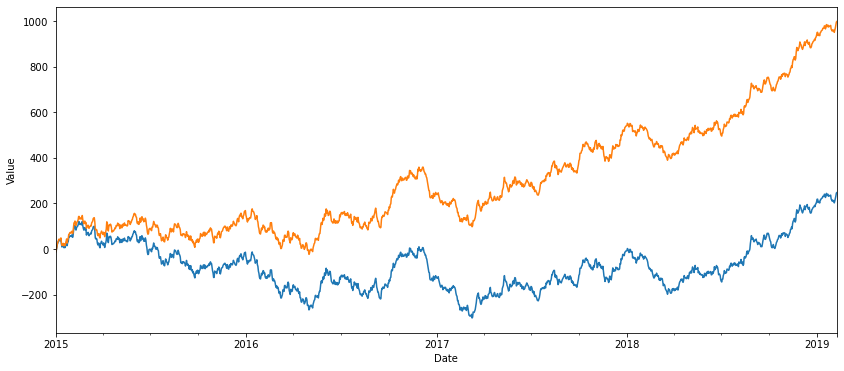

In [5]:
# Same values from above but have a constant "drift" in the epsilon
c = 0.5
vals_drift = y0 + np.cumsum(c + epsilon) 
time_series_drift =  pd.Series(vals_drift, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
time_series_drift.plot()
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

# Autoregressive (AR) Model

## Properties

Formula: $Y(t) = \mu + \phi * Y(t-1)+\epsilon(t)$

> $\phi = 0$: simply the white noise model (mean of $\mu$)
>
> $\phi \lt 0$: oscillates
>
> $\phi \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

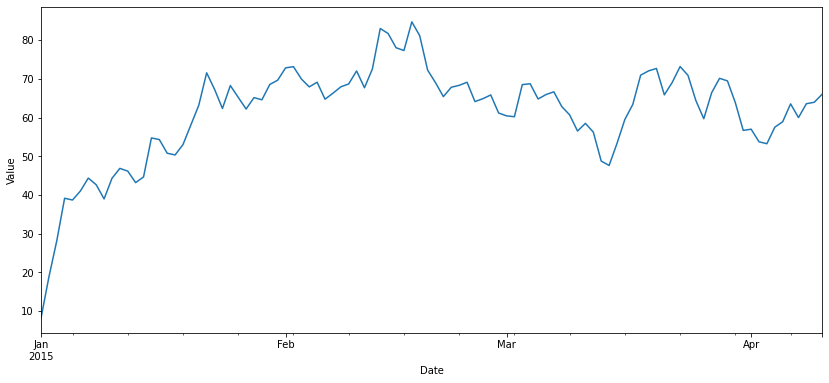

In [9]:
avg = 0
std = 4
n_pts = 100


mu = 7
# phi = 0.1
# phi = 0.5
phi = 0.9
# phi = -0.1
# phi = -0.5
# phi = -0.9

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts)

#
vals = []
y = 0
for e in epsilon:
    y = y * phi  + e + mu
    vals.append(y)
    
    
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

In [7]:
a = [1]*5
a = a * np.linspace(1,2,5)
a

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

# Moving Average (MA) Model

Formula: $Y(t) = \mu + \theta * \epsilon(t-1)+\epsilon(t)$

> $\theta = 0$: simply the white noise model (mean of $\mu$)
>
> $\theta \lt 0$: oscillates
>
> $\theta \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

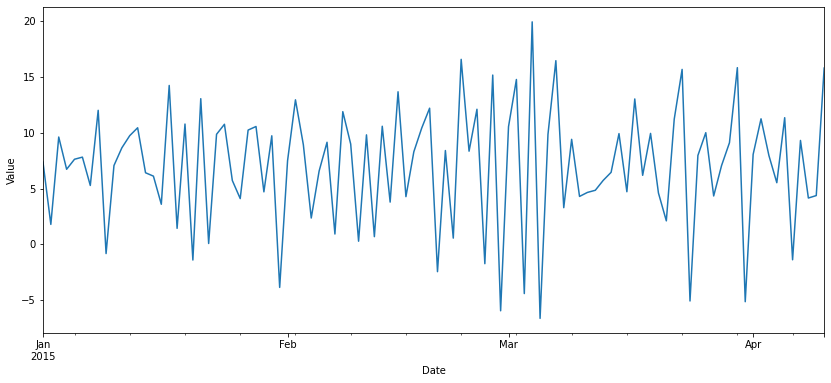

In [15]:
avg = 0
std = 4
n_pts = 100


mu = 7
# theta = 0.1
# theta = 0.5
# theta = 0.9
# theta = -0.1
# theta = -0.5
theta = -0.9

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts+1)

#
vals = []
y = 0
for i in range(len(epsilon)-1):
    y = epsilon[i] * theta  + epsilon[i+1] + mu
    vals.append(y)
    
    
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

# ARMA Model

Combine them together; can have both regression on past values (AR) and previous errors affect future errors (MA)

Formula: $Y(t) = \mu + \epsilon(t) + \phi * Y(t-1) +  \theta * \epsilon(t-1)$


## Higher Order

ARMA(2,1) yields

$$Y(t) = \mu + \epsilon(t) + \phi_2 * Y(t-2) + \phi_1 * Y(t-1) +  \theta * \epsilon(t-1)$$

# Forecasting a Time Series

Forecasting for a time series will deviate a bit from our prior machine learning process.

## Train, Validation, Test

When developing a time series model, you typically will train 

### Fixed Partitioning

> In **fixed partitioning**, we designate sections for training, validation, and testing.

![](images/train-valid-test.png)

It's common to use new _incoming_ data as the test set and only have a training and validation set.

![](images/train-valid.png)

After training and evaluating, we will train the _whole_ model on all the data (train, validation, and test sets) since time series typically will rely on past data points.

### Roll-Forward Partitioning

> In **roll-forward** partitioning, we evaluate the model on the data following after the training cutoff and incrementally include more data and evaluating on the next set of data. 

![](images/train-valid.png)

The hope is to better simulate what real-world production will look like at the cost of training the model multiple times.

## The Baseline Model - Naive Forecasting

> A simple (though sometimes difficult to beat) model is the **naive model** which is just the data shifted by one time-step.

![](images/naive_model.png)

This creates a good baseline to see how well our other models do!